# tie-point model for ice and open water

In [6]:
#tie-point model for ice and open water
import numpy as np

def tiepoint(overfladetemperatur,snedybde,istykkelse, iskoncentration):
    #the mar+april 2013 model
    #Tb for sea ice
    #overfladetemperatur [K]
    #snedybde [m]
    #istykkelse [m]
    #iskoncentration [0-1]
    T6vsi = 151.981 + 0.398 * overfladetemperatur+ 23.360 * snedybde -3.031 * istykkelse
    T6hsi = 55.262 + 0.687 * overfladetemperatur+ 12.962 * snedybde -1.664 * istykkelse
    T10vsi = 145.878 + 0.435 * overfladetemperatur+ 0.743 * snedybde -4.202 * istykkelse
    T10hsi = 45.107 + 0.753 * overfladetemperatur -18.7322 * snedybde -3.490 * istykkelse
    T18vsi = 138.073 + 0.479 * overfladetemperatur -71.814 * snedybde -5.570 * istykkelse
    T18hsi = 78.424 + 0.641 * overfladetemperatur -85.184 * snedybde -5.341 * istykkelse
    T36vsi = 123.102 + 0.526 * overfladetemperatur -216.727 * snedybde -4.036 * istykkelse
    T36hsi = 131.862 + 0.429 * overfladetemperatur -214.352 * snedybde -3.035 * istykkelse
    T89vsi = 2.525 + 0.902 * overfladetemperatur -180.427 * snedybde+ 1.904 * istykkelse
    T89hsi = 31.120 + 0.743 * overfladetemperatur -184.806 * snedybde+ 3.197 * istykkelse
    #Tb for open water
    T6vow=161.35
    T6how=82.13
    T10vow=167.34
    T10how=88.26
    T18vow=183.72
    T18how=108.46
    T36vow=196.41
    T36how=128.23
    T89vow=243.20
    T89how=196.94
    #Tb for ice and open water
    T6vsim  = iskoncentration*T6vsi  + (1-iskoncentration)*T6vow
    T6hsim  = iskoncentration*T6hsi  + (1-iskoncentration)*T6how
    T10vsim = iskoncentration*T10vsi + (1-iskoncentration)*T10vow
    T10hsim = iskoncentration*T10hsi + (1-iskoncentration)*T10how
    T18vsim = iskoncentration*T18vsi + (1-iskoncentration)*T18vow
    T18hsim = iskoncentration*T18hsi + (1-iskoncentration)*T18how
    T36vsim = iskoncentration*T36vsi + (1-iskoncentration)*T36vow
    T36hsim = iskoncentration*T36hsi + (1-iskoncentration)*T36how    
    T89vsim = iskoncentration*T89vsi + (1-iskoncentration)*T89vow
    T89hsim = iskoncentration*T89hsi + (1-iskoncentration)*T89how    
        
    Tbv=np.array([T6vsim,T10vsim,T18vsim,T36vsim,T89vsim])
    Tbh=np.array([T6hsim,T10hsim,T18hsim,T36hsim,T89hsim])
    return Tbv, Tbh

In [7]:
import numpy as np

def reg_mod13(IST,SD,IT):
    #the mar+april 2013 model
    #surface temperature?
    T6vsim = 151.981535394 + 0.39827296166 * IST+ 23.3600203008 * SD -3.03183834111 * IT
    T6hsim = 55.2623240539 + 0.687577210357 * IST+ 12.9621301692 * SD -1.66486943272 * IT
    T10vsim = 145.878105173 + 0.435432823207 * IST+ 0.743658800361 * SD -4.20200228328 * IT
    T10hsim = 45.1075848344 + 0.753868056619 * IST -18.7322202698 * SD -3.49097027752 * IT
    T18vsim = 138.073033941 + 0.479944899424 * IST -71.814765826 * SD -5.57027693189 * IT
    T18hsim = 78.4247537087 + 0.641671517779 * IST -85.1843265565 * SD -5.34143981869 * IT
    T36vsim = 123.102065469 + 0.526904188123 * IST -216.727298154 * SD -4.03697464853 * IT
    T36hsim = 131.862853412 + 0.429489868157 * IST -214.352191714 * SD -3.03524993537 * IT
    T89vsim = 2.52567864217 + 0.902202528995 * IST -180.427137566 * SD+ 1.90480465092 * IT
    T89hsim = 31.1206976877 + 0.743826485118 * IST -184.806381816 * SD+ 3.19723383624 * IT
    Tb=np.array([T6vsim,T6hsim,T10vsim,T10hsim,T18vsim,T18hsim,T36vsim,T36hsim,T89vsim,T89hsim])
    return Tb


In [8]:
import numpy as np
#from Ivanova et al., 2015 TC, open water tie-points incl. atmos. freqs: 6, 10, 18, 22, 37, 89 GHz
OWTPV=np.array([161.35,167.34,183.72,196.41,209.81,243.20])
OWTPH=np.array([82.13, 88.26, 108.46,128.23,145.29,196.94])


In [9]:
import numpy as np
def smrt_profile(snowt,icet,Ts,icetype):
    #snowt: snow thickness [m]
    #icet: ice thickness [m]
    #Ts: thermometric temperature of the surface
    #icetype: first- or multiyear ice ['firstyear'/'multiyear']
    
        
    #compute num: layer number, top to bottom
    #total depth in cm
    hs=int(np.floor(snowt*100))
    hi=int(np.floor(icet*100))
    total_depth=int(hs+hi)
    num=np.array(range(total_depth))
    num=num+1
    
    #compute layer thickness
    di=0.01*np.ones(total_depth)
    
    #comute the thermometric temperature
    Ti=np.zeros(int(total_depth))
    snowtemp=np.zeros(int(hs))
    icetemp=np.zeros(int(hi))
    Tw=271.35
    ks=0.3
    ki=2.1
    #snedybden skal ikke være null her
    f=(ks*hi)/(ki*hs) 
    Tsi=(Tw+f*Ts)/(f+1)
    
    for i in range(hs):
        snowtemp[i]=Ts+i*(Tsi-Ts)/hs
    for j in range(hi):
        icetemp[j]=Tsi+j*(Tw-Tsi)/hi
        Ti[0:hs]=snowtemp[:]
        Ti[hs:hs+hi]=icetemp[:]
        
    #water content in the snow
    Wi=np.zeros(total_depth)
    
    #density profile : cox & weeks sammenhaeng mellem massefylde og saltindhold
    roi=np.zeros(total_depth)
    #snow density
    snow_density=np.ones(hs)
    w=int((np.floor(hs/4)))
    if hs < 4: snow_density[:]=330.0
    else:
        snow_density[0:w]=250.0
        snow_density[w:]=330.0
        snow_density=np.flipud(snow_density)
        
    ice_density=np.zeros(hi)
    #First-year ice density (icethickness)
    if icetype=='firstyear': 
        ice_density[:]=926.0
        
    #Multiyear ice density Hummock (icethickness)
    if icetype=='multiyear':
        humdens=np.zeros(20)
        tdens=750.0
        bdens=910.0
        for i in range(20):
            humdens[i]=tdens+i*(bdens-tdens)/20
        ice_density[0:20]=humdens[:]
        ice_density[20:hi]=bdens
        
    roi[0:hs]=snow_density[:]
    roi[hs:hs+hi]=ice_density[:]
    
    #the scattering correlation length
    snow_grain_size = 20
    pci=np.zeros(total_depth)
    snow_pcc=np.zeros(hs)
    ice_pcc=np.zeros(hi)
    for i in range(hs):
        snow_pcc[i] = 0.01*snow_grain_size*np.exp(-3.0*(i/hs))+0.07
    snow_pcc=np.flipud(snow_pcc)
    if icetype=='firstyear': ice_pcc[:]=0.1
    elif icetype=='multiyear': 
        ice_pcc[0:20]=0.8
        ice_pcc[20:hi]=0.2
    pci[0:hs]=snow_pcc[:]
    pci[hs:hi+hs]=ice_pcc[:]
    
    #the salinity
    snow_sal=np.zeros(hs)
    ice_sal=np.zeros(hi)
    simt=np.zeros(hi)
    sal=np.zeros(total_depth)
    CW2=7.88-1.59*(hi/100.0)
    
    #First-year ice snow and ice salinity
    if icetype=='firstyear':
        for i in range(hs):
            snow_sal[i] = 2*CW2*np.exp(-10.0*(i/hs))
        for j in range(hi):
            ice_sal[j]=(2*CW2*np.exp(-5*j/hi)+10.0*j/hi)*np.exp(-8.0*j/hi)+np.exp(2.5*j/hi)
    elif icetype=='multiyear':
        tsal=0.0
        bsal=5.0
        snow_sal[:]=0.0
        for j in range(hi):
            ice_sal[j]=tsal+j*(bsal-tsal)/hi
    sal[0:hs]=np.flipud(snow_sal[:])
    sal[hs:hi+hs]=ice_sal[:]
   
    typei=np.ones(total_depth)
    snow_type=np.ones(hs)
    idx=(snow_pcc > 0.2)
    snow_type[idx]=2.0
    ice_type=np.ones(hi)
    if icetype=='firstyear': ice_type[:]=3
    elif icetype=='multiyear': ice_type[:]=4
    
    typei[0:hs]=snow_type[:]
    typei[hs:hs+hi]=ice_type[:]
    
    si=np.zeros(total_depth)
    si[hs:hs+hi]=1.0
    
    return num, di, Ti, Wi, roi, pci, sal, typei, si

1
2
SUBSTRATE: <smrt.substrate.flat.Flat object at 0x00000200DFA49730>
SUBSTRATE: <smrt.substrate.flat.Flat object at 0x00000200DFA49730>
SUBSTRATE: <smrt.substrate.flat.Flat object at 0x00000200DFA49730>
SUBSTRATE: <smrt.substrate.flat.Flat object at 0x00000200DFA49730>
SUBSTRATE: <smrt.substrate.flat.Flat object at 0x00000200DFA49730>
SUBSTRATE: <smrt.substrate.flat.Flat object at 0x00000200DFA49730>
3
[260.14715689 254.32696704 232.42027387 197.01148384 195.78344748]
[226.64047272 221.37798943 201.703987   173.96394059 179.83183403]


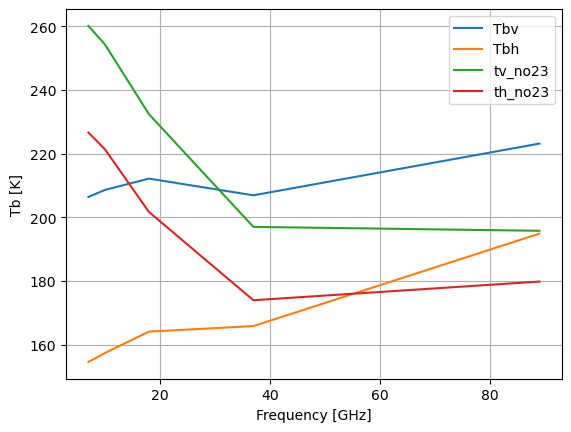

In [10]:
import matplotlib.pyplot as plt
import numpy as np

import sys
#sys.path.append("/home/rtt/code/smrt/smrt-master")
# export PYTHONPATH=$PYTHONPATH:/home/rtt/code/smrt/smrt-master

sys.path.append("/Users\fnifd\Documents\BachelorProject\smrt\smrt-master")
#export PYTHONPATH=$PYTHONPATH: \Users\fnifd\Documents\BachelorProject\smrt\smrt-master

# local import
from smrt import make_ice_column, make_snowpack, make_model, sensor_list
from smrt import PSU
from smrt.permittivity.saline_snow import saline_snow_permittivity_geldsetzer09
#from smrt.inputs.make_medium import make_ice_column
ice_type = 'multiyear' # firstyear or multiyear sea ice
#smrt_profile inputs: snow depth, ice thickness, surface temperature, ice type, returns profiles
[num, di, Ti, Wi, roi, pci, sal, typei, si] = smrt_profile(0.15,2.5,250,ice_type)
#split into snow and sea ice indices
snow=(si==0)
ice=(si==1)

#the profiles: snow
thickness_snow=di[snow]
density_snow=roi[snow]
temperature_snow=Ti[snow]
p_ex_snow=pci[snow]*1e-3
salinity_snow=sal[snow]*PSU

#profiles: ice
thickness_ice=di[ice]
temperature_ice=Ti[ice]
salinity_ice=sal[ice]*PSU
density_ice=roi[ice]
p_ex_ice=pci[ice]*1e-3


ice_column = make_ice_column(ice_type=ice_type,
                            thickness=thickness_ice,
                            temperature=temperature_ice,
                            microstructure_model="exponential",
                            brine_inclusion_shape="spheres", 
                            salinity=salinity_ice, 
                            density = density_ice,
                            corr_length=p_ex_ice,
                            add_water_substrate="ocean"
                            )
snowpack = make_snowpack(thickness=thickness_snow,
                         microstructure_model="exponential",
                         density=density_snow,
                         temperature=temperature_snow,
                         corr_length=p_ex_snow,
                         salinity=salinity_snow,
                         ice_permittivity_model=saline_snow_permittivity_geldsetzer09)



#add snowpack on top of ice column:
medium = snowpack + ice_column

# create the sensor
sensor = sensor_list.amsre()

#n_max_stream = 128 #TB calculation is more accurate if number of streams is increased (currently: default = 32);
n_max_stream=32
#needs to be increased when using > 1 snow layer on top of sea ice! normalization="forced"

print('1')
m = make_model("iba", "dort", rtsolver_options ={"n_max_stream": n_max_stream})

print('2')
# run the model for snow-covered sea ice:
brightness_temperatures = m.run(sensor, medium)

print('3')
# print TBs at horizontal and vertical polarization Tb's:
#print(brightness_temperatures.TbH(), brightness_temperatures.TbV())
tbv=brightness_temperatures.TbV()
tbh=brightness_temperatures.TbH()
tv_no23=np.array([tbv[0],tbv[1],tbv[2],tbv[4],tbv[5]])
th_no23=np.array([tbh[0],tbh[1],tbh[2],tbh[4],tbh[5]])
print(tv_no23)
print(th_no23)

freqs=np.array([7,10,18,37,89])
#plt.plot(freqs,brightness_temperatures.TbV())
#plt.plot(freqs,brightness_temperatures.TbH())
Tbv,Tbh=tiepoint(250,0.15,1.15,.5)
plt.plot(freqs,Tbv, label = 'Tbv')
plt.plot(freqs,Tbh, label = 'Tbh')
plt.plot(freqs,tv_no23, label = 'tv_no23')
plt.plot(freqs,th_no23, label = 'th_no23')
plt.xlabel('Frequency [GHz]')
plt.ylabel('Tb [K]')
plt.legend()
plt.grid()
plt.show()

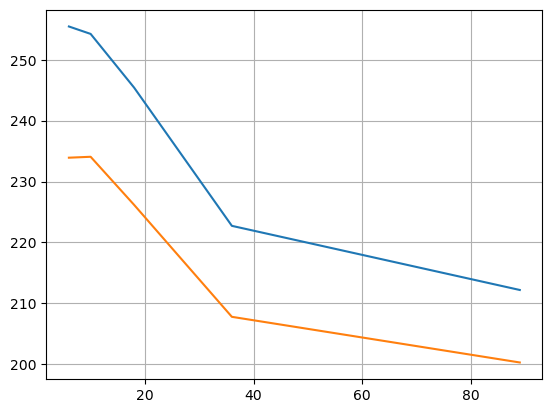

In [10]:
import matplotlib.pyplot as plt
import numpy as np
Tbv,Tbh=tiepoint(260,0.15,1.15,1.0)
freqs=np.array([6,10,18,36,89])
plt.plot(freqs,Tbv)
plt.plot(freqs,Tbh)
plt.grid()
plt.show()

In [15]:
def optimal_ice(Tb):
    #input parametre:
    #maalte straalingstemperature Tb [K], 1xn vektor
    #kovariansmatricen Se for Tb nxn matrice
    #foerste gaet paa fysiske vaerdier P0, 1xm vektor
    #kovarians matricen Sp for de fysiske vaerdier, mxm matrice

    #kovariansmatricen for de estimerede straalingstemperatur vaerdier S
    Se=np.matrix([[0.2, 0.15, 0.1, 0.05, 0, 0, 0, 0, 0, 0, 0, 0],\
                  [0.15, 0.2, 0.15, 0.1, 0.05, 0, 0, 0, 0, 0, 0, 0],\
                  [0.1, 0.15, 0.2, 0.15, 0.1, 0.05, 0, 0, 0, 0, 0, 0],\
                  [0.05, 0.1, 0.15, 0.2, 0.15, 0.1, 0.05, 0, 0, 0, 0, 0],\
                  [0, 0.05, 0.1, 0.15, 0.2, 0.15, 0.1, 0.05, 0, 0, 0, 0],\
                  [0, 0, 0.05, 0.1, 0.15, 0.2, 0.15, 0.1, 0.05, 0, 0, 0],\
                  [0, 0, 0, 0.05, 0.1, 0.15, 0.2, 0.15, 0.1, 0.05, 0, 0],\
                  [0, 0, 0, 0, 0.05, 0.1, 0.15, 0.2, 0.15, 0.1, 0.05, 0],\
                  [0, 0, 0, 0, 0, 0.05, 0.1, 0.15, 0.2, 0.15, 0.1, 0.05],\
                  [0, 0, 0, 0, 0, 0, 0.05, 0.1, 0.15, 0.2, 0.15, 0.1],\
                  [0, 0, 0, 0, 0, 0, 0, 0.05, 0.1, 0.15, 0.2, 0.15],\
                  [0, 0, 0, 0, 0, 0, 0, 0, 0.05, 0.1, 0.15, 0.2]])

    #kovariansmatricen for de estimerede fysiske vardier P
    Sp=np.matrix([[0.5, 0.1, 0.1, 0.0],\
                  [0.1, 0.5, 0.0, 0.0],\
                  [0.0, 0.0, 15.0, 0.1],\
                  [0.0, 0.1, 0.1, 0.5]])

    #vektor med fysiske vaerdier
    r=0.1
    snow_depth=0.1
    iceT=261.0
    myf=0.01
    P0 = np.array([r,snow_depth,iceT,myf]) #initial vaerdier for isen 

    #eksempel paa kald af emimod-funktionen
    #tbv,tbh = emimod.emimodia(ia,freq,snow_rough,ice_rough,snow_corr,snowT,snow_dens,snow_depth,snow_water,iceT,myf)
        #tbv,tbh = emimod.emimodia(53,6,0.0028,0.005,0.12,snowT,300,snow_depth,0,iceT,myf)
    #Tb=emimod.emice(snowT,snow_depth,iceT,myf)

    #oevre og nedre graenser til de fysiske parametre
    L=np.array([0.0,0.55,0.0,1.0,190.0,273.15,0.0,1.0])
    len_p = len(P0)
    len_tb = len(Tb)
    melements = (len_p,len_tb)
    M = np.matrix(np.ones(melements))
    n=0
    #start while loop
    while n<5:
        n=n+1
        #kald forward model med seneste gaet. samtidig reference til adjoint model.
        if n==1:
            Ta=emimod.emice_amsr(P0[0],P0[1],P0[2],P0[3])
        else:
            Ta=emimod.emice_amsr(P[0],P[1],P[2],P[3])
        #start for loop over parametre
        for i in range(len_p):
            #beregn partiell afledede ->kald forwardmodel med pertubationer for hver parameter, pertubationer 1%
            if n==1:
                #M matricen "the adjoint" foeste iteration bruger initialvaerdierne
                M[i,:] = (emimod.emice_amsr((0.01*(i==0)*P0[0])+P0[0],(0.01*(i==1)*P0[1])+P0[1],(0.01*(i==2)*P0[2])+P0[2],(0.01*(i==3)*P0[3])+P0[3]) -\
                         (emimod.emice_amsr(P0[0],P0[1],P0[2],P0[3]))) /\
                         ((0.01*(i==0)*P0[0])+(0.01*(i==1)*P0[1])+(0.01*(i==2)*P0[2])+(0.01*(i==3)*P0[3]))
                #efterfoelgende iterationer
            else:
                M[i,:] = (emimod.emice_amsr((0.01*(i==0)*P[0])+P[0],(0.01*(i==1)*P[1])+P[1],(0.01*(i==2)*P[2])+P[2],(0.01*(i==3)*P[3])+P[3]) -\
                         (emimod.emice_amsr(P[0],P[1],P[2],P[3]))) /\
                         ((0.01*(i==0)*P[0])+(0.01*(i==1)*P[1])+(0.01*(i==2)*P[2])+(0.01*(i==3)*P[3]))
        M = M.T
        #beregn S
        S = (Sp.I + M.T*Se.I*M).I
        #check konvergens kriteria f.eks. n>5
        #hvis n>4 (antallet af iterationer) print S diagonal + alt andet
        if n>4:
            P_final = P
            S_diag = np.diag(S)
        elif n==1:
            P0 = np.matrix(P0).T
            Tb = np.matrix(Tb).T
            Ta = np.matrix(Ta).T
            #estimer fysiske vaerdier ud fra foerste gaet
            
            P = P0 + S*(M.T*Se.I*(Tb - Ta) + Sp.I*(P0 - P0))
            
            #Det virker strengt taget ikke til at vaere noedvendigt med fysiske begraensninger, for aabent vand
            if (P[0] < L[0]): P[0] = L[0]+0.1
            if (P[0] > L[1]): P[0] = L[1]
            if (P[1] < L[2]): P[1] = L[2]+0.01
            if (P[1] > L[3]): P[1] = L[3]
            if (P[2] < L[4]): P[2] = L[4]+0.1
            if (P[2] > L[5]): P[2] = L[5]
            if (P[3] < L[6]): P[3] = L[6]+0.01
            if (P[3] > L[7]): P[3] = L[7]
            P_1 = P
            M = M.T
            P0 = np.array(P0.T).reshape(len_p)
            Tb = np.array(Tb.T).reshape(len_tb)
            Ta = np.array(Ta.T).reshape(len_tb)
            P = np.array(P.T).reshape(len_p)
        else:
            P0 = np.matrix(P0).T
            Tb = np.matrix(Tb).T
            Ta = np.matrix(Ta).T
            #2. 3. 4. iteration frem mod fysiske vaerdier der faar Tb til at passe
            P = P_1 + S*(M.T*Se.I*(Tb - Ta) + Sp.I*(P0 - P_1))
            if (P[0] < L[0]): P[0] = L[0]+0.1
            if (P[0] > L[1]): P[0] = L[1]
            if (P[1] < L[2]): P[1] = L[2]+0.01
            if (P[1] > L[3]): P[1] = L[3]
            if (P[2] < L[4]): P[2] = L[4]+0.1
            if (P[2] > L[5]): P[2] = L[5]
            if (P[3] < L[6]): P[3] = L[6]+0.01
            if (P[3] > L[7]): P[3] = L[7]
            P_1 = P
            M = M.T
            P0 = np.array(P0.T).reshape(len_p)
            Tb = np.array(Tb.T).reshape(len_tb)
            Ta = np.array(Ta.T).reshape(len_tb)
            P = np.array(P.T).reshape(len_p)
            #tilbage til while loop start
    return P_final, S_diag


In [25]:
import xarray as xr


In [26]:
def get_data_var_from_netCDF(f_path = None, var_name = None, coords = None):
        # If no varable name is given, print the possibilities
        if (var_name == None) | (f_path == None):
            print('usage: get_data_var_from_netCDF(f_path = [file path], var_name = [variable name], <coords = [j, i]>)\n')
            print(var_name_tabel)
            return
        # If a set of coordinates is given, return the indexed data point
        if coords:
            if isinstance(coords, list):
                # converting list to array
                coords = np.array(coords)
                return xr.open_dataset(f_path)[var_name].values[tuple(coords)]
            else:
                print("Variable 'coords' must be of type 'list'. E.g.: coords = [1,2]")
        # If no coordinates are given, return the full data array
        else:
            return xr.open_dataset(f_path)[var_name].values

In [47]:
f_path = '../Data/iceh.2011-01.nc'

# Get data array
st = get_data_var_from_netCDF(f_path = f_path, var_name = 'Tsnz')[0] + 273.15 # 0 is highest and 4 is lowest
sd = get_data_var_from_netCDF(f_path = f_path, var_name = 'hs')
id = get_data_var_from_netCDF(f_path = f_path, var_name = 'hi')
ic = get_data_var_from_netCDF(f_path = f_path, var_name = 'aice')
# Set ice type
ice_type = 'firstyear'
# Set ice concentration limit
ic_limit = 0.9
st[ic < ic_limit] = np.nan
sd[ic < ic_limit] = np.nan
id[ic < ic_limit] = np.nan
ic[ic < ic_limit] = np.nan


st_data = st[np.invert(np.isnan(st))]
print(np.size(st_data))
print(st_data)

140565
[353.1973  351.2496  353.10904 ... 268.08835 268.074   268.0606 ]


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import sys
#sys.path.append("/home/rtt/code/smrt/smrt-master")
# export PYTHONPATH=$PYTHONPATH:/home/rtt/code/smrt/smrt-master

sys.path.append("/Users\fnifd\Documents\BachelorProject\smrt\smrt-master")
#export PYTHONPATH=$PYTHONPATH: \Users\fnifd\Documents\BachelorProject\smrt\smrt-master

# local import
from smrt import make_ice_column, make_snowpack, make_model, sensor_list
from smrt import PSU
from smrt.permittivity.saline_snow import saline_snow_permittivity_geldsetzer09
#from smrt.inputs.make_medium import make_ice_column
ice_type = 'multiyear' # firstyear or multiyear sea ice
#smrt_profile inputs: snow depth, ice thickness, surface temperature, ice type, returns profiles

In [55]:
for i in range(1):
    [num, di, Ti, Wi, roi, pci, sal, typei, si] = smrt_profile(0.15,2.5,250,ice_type)
    #split into snow and sea ice indices
    snow=(si==0)
    ice=(si==1)

    #the profiles: snow
    thickness_snow=di[snow]
    density_snow=roi[snow]
    temperature_snow=Ti[snow]
    p_ex_snow=pci[snow]*1e-3
    salinity_snow=sal[snow]*PSU

    #profiles: ice
    thickness_ice=di[ice]
    temperature_ice=Ti[ice]
    salinity_ice=sal[ice]*PSU
    density_ice=roi[ice]
    p_ex_ice=pci[ice]*1e-3


    ice_column = make_ice_column(ice_type=ice_type,
                            thickness=thickness_ice,
                            temperature=temperature_ice,
                            microstructure_model="exponential",
                            brine_inclusion_shape="spheres", 
                            salinity=salinity_ice, 
                            density = density_ice,
                            corr_length=p_ex_ice,
                            add_water_substrate="ocean"
                            )
    snowpack = make_snowpack(thickness=thickness_snow,
                         microstructure_model="exponential",
                         density=density_snow,
                         temperature=temperature_snow,
                         corr_length=p_ex_snow,
                         salinity=salinity_snow,
                         ice_permittivity_model=saline_snow_permittivity_geldsetzer09)



    #add snowpack on top of ice column:
    medium = snowpack + ice_column

    # create the sensor
    sensor = sensor_list.amsre()

    #n_max_stream = 128 #TB calculation is more accurate if number of streams is increased (currently: default = 32);
    n_max_stream=32
    #needs to be increased when using > 1 snow layer on top of sea ice! normalization="forced"

    m = make_model("iba", "dort", rtsolver_options ={"n_max_stream": n_max_stream})

    # run the model for snow-covered sea ice:
    brightness_temperatures = m.run(sensor, medium)

    # print TBs at horizontal and vertical polarization Tb's:
    #print(brightness_temperatures.TbH(), brightness_temperatures.TbV())
    tbv=brightness_temperatures.TbV()
    tbh=brightness_temperatures.TbH()
    tv_no23=np.array([tbv[0],tbv[1],tbv[2],tbv[4],tbv[5]])
    th_no23=np.array([tbh[0],tbh[1],tbh[2],tbh[4],tbh[5]])
    print(' ')
    print(tv_no23)
    print(th_no23)
    print(' ')
    

SUBSTRATE: <smrt.substrate.flat.Flat object at 0x000002A48BC59430>
SUBSTRATE: <smrt.substrate.flat.Flat object at 0x000002A48BC59430>
SUBSTRATE: <smrt.substrate.flat.Flat object at 0x000002A48BC59430>
SUBSTRATE: <smrt.substrate.flat.Flat object at 0x000002A48BC59430>
SUBSTRATE: <smrt.substrate.flat.Flat object at 0x000002A48BC59430>
SUBSTRATE: <smrt.substrate.flat.Flat object at 0x000002A48BC59430>
 
[254.33857466 254.11609034 253.30394632 252.47560609 223.83573504]
[224.04705593 226.90071201 229.29475548 231.33933874 210.15744536]
 


In [53]:
smrt.substrate.flat

NameError: name 'smrt' is not defined